# Dispersive calculation of triangle diagram
03.2018 / Misha Mikhasenko

Exercise with Tomasz and Adam

In [1]:
const m1sq = 5.619^2
const m2sq = 0.4936^2
const m3sq = 3.510^2
const m4sq = 0.938^2
const th34 = (sqrt(m3sq)+sqrt(m4sq))^2
const th24 = (sqrt(m2sq)+sqrt(m4sq))^2;

Thresholds in $s$-channel

In [2]:
(sqrt(m3sq)-sqrt(m4sq)), (sqrt(m3sq)+sqrt(m4sq)), (sqrt(m1sq)-sqrt(m2sq)), (sqrt(m1sq)+sqrt(m2sq))

(2.572, 4.4479999999999995, 5.1254, 6.1126)

### Projection to the cross-channel using dispersive representation

The required projection reads
$$
b(s) = \int_{-1}^{1}\frac{\mathrm{d}z}{2} B(t(z,s)) = \frac{1}{4pq}\int_{t_\text{min}}^{t_\text{max}} \mathrm{d} t \,B(t(z,s)).
$$
The scattering amplitude $B(t)$ is given by the dispersive integral
$$
B(t) = \frac{1}{\pi}\int_{\text{th}}^{\infty}  \frac{\text{Im}B(t)}{t'-t-i0}
$$

The result in integration over $t$ is
$$
b(s) = \frac{1}{\pi}\int_{\text{th}}^{\infty} \mathrm{d}t'\,\text{Im} B(t') f(t',s),
$$
where $f(t',s)$ is an analytic function:
$$
f(t',s) = \frac{1}{4pq}\left[\log(t'-t_\text{min})-\log(t'-t_\text{max})\right]
$$
and $t_\text{min}$, $t_\text{max}$ are given by
$$
t_{\text{max/min}} = m_1^2+m_3^2-\frac{(s+m_1^2-m_2^2)(s+m_3^2-m_4^2)}{2s} \pm 2pq
$$

#### It is extremely important to choose correctly the branching cuts in $pq$
$$
4s\,pq = \sqrt{m_1^2 - (\sqrt{s}-m_2)^2}\sqrt{m_1^2 - (\sqrt{s}+m_2)^2} \lambda^{1/2}(s,m_3^2,m_4^2)
$$
To select a correct sheet I use the Bronzan-Kascer prescription $m_1^2 \to m_1^2 + i\epsilon$, see [Phys.Rev.132 (1963)].

In [3]:
λ(x,y,z) = x^2+y^2+z^2-2x*y-2y*z-2z*x
function tmin(s)
    m1sq_ph = m1sq+1e-6im  # Bronzan-Kascer
    pq = sqrt(m1sq_ph-(sqrt(s)+sqrt(m2sq))^2)*
         sqrt(m1sq_ph-(sqrt(s)-sqrt(m2sq))^2)*
        sqrt(λ(s,m3sq,m4sq))/(4s)
    m3sq+m1sq_ph-(s+m1sq_ph-m2sq)*(s+m3sq-m4sq)/(2s)-2pq
end
function tmax(s)
    m1sq_ph = m1sq+1e-6im  # Bronzan-Kascer
    pq = sqrt(m1sq_ph-(sqrt(s)+sqrt(m2sq))^2)*
         sqrt(m1sq_ph-(sqrt(s)-sqrt(m2sq))^2)*
        sqrt(λ(s,m3sq,m4sq))/(4s)
    m3sq+m1sq_ph-(s+m1sq_ph-m2sq)*(s+m3sq-m4sq)/(2s)+2pq
end
function f_proj_disp(t,s)
    m1sq_ph = m1sq+1e-6im  # Bronzan-Kascer
    pq = sqrt(m1sq_ph-(sqrt(s)+sqrt(m2sq))^2)*
         sqrt(m1sq_ph-(sqrt(s)-sqrt(m2sq))^2)*
        sqrt(λ(s,m3sq,m4sq))/(4s)
    # 
    (log(t-tmin(s))-log(t-tmax(s)))/(4pq)
end

f_proj_disp (generic function with 1 method)

### The movement of $t_\text{min/max}$ as a function of $s$

In [9]:
using Plots
gr(fmt = :png)

Plots.GRBackend()

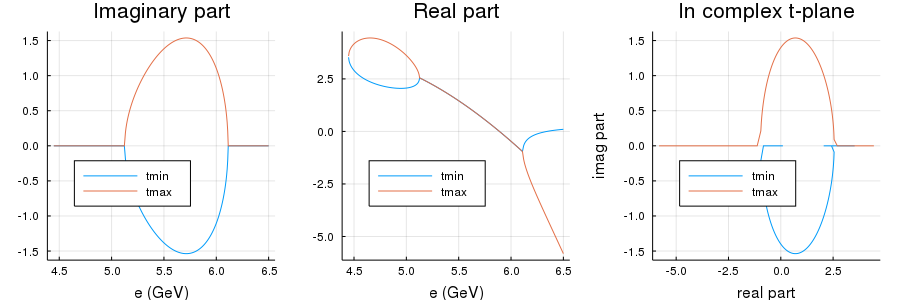

In [10]:
ev = LinRange(sqrt(th34)+1e-4,6.5,400)
tmin_v = [tmin(e^2) for e in ev]
tmax_v = [tmax(e^2) for e in ev]
plot(
    plot(ev, [imag(tmin_v), imag(tmax_v)], lab = ["tmin" "tmax"], title="Imaginary part", leg=:bottomleft, xlab="e (GeV)"),
    plot(ev, [real(tmin_v), real(tmax_v)], lab = ["tmin" "tmax"], title="Real part", leg=:bottomleft, xlab="e (GeV)"),
    plot([real(tmin_v), real(tmax_v)], [imag(tmin_v), imag(tmax_v)], lab = ["tmin" "tmax"],
        title="In complex t-plane", leg=:bottomleft, xlab="real part", ylab="imag part"),
    layout=grid(1,3), size=(900,300)
    )

Plot function $f(t,s = \text{fixed})$

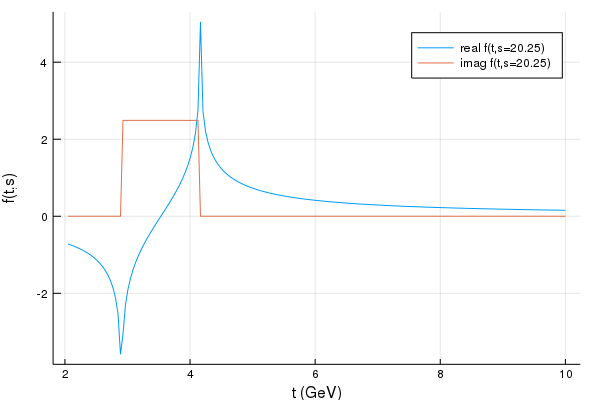

In [11]:
let s = 4.5^2
    tv = LinRange(th24,10,200)
    cal = f_proj_disp.(tv,s)
    plot(tv, real(cal), lab="real f(t,s=$s)")
    plot!(tv, imag(cal), lab="imag f(t,s=$s)")
end
plot!(xlab = "t (GeV)", ylab = "f(t,s)")

In [12]:
function ImB(t)
    Γ = 0.1;
#     M = 1.89;
    M = 2.07;
    1.0/((M^2-t)^2+Γ^2)
end

ImB (generic function with 1 method)

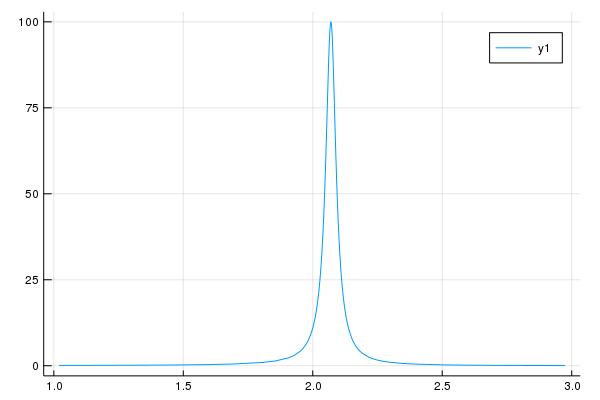

In [13]:
plot(e->ImB(e^2), 1,3)

Calculate the projection:
$$
b(s) = \frac{1}{\pi}\int_{\text{th}}^{\infty} \mathrm{d}t'\,\text{Im} B(t') f(t',s),
$$

In [14]:
using QuadGK # intgration package

In [15]:
function bλ_proj(s)
    function integrand(θ)
        tp = th24+tan(θ)
        ImB(tp)*f_proj_disp(tp,s)/cos(θ)^2
    end
    sqrt(λ(s,m3sq,m4sq))*(quadgk(integrand,0,π/2)[1]/π)::Complex{Float64}
end

bλ_proj (generic function with 1 method)

For taking the integral to $\inf$, I use $t = \text{th}_{24}+\tan(\theta)$ substitution. The jacobian is $1/\cos^2(\theta)$.

That is how the projection look like.

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[16]:1
└ @ Core In[16]:1


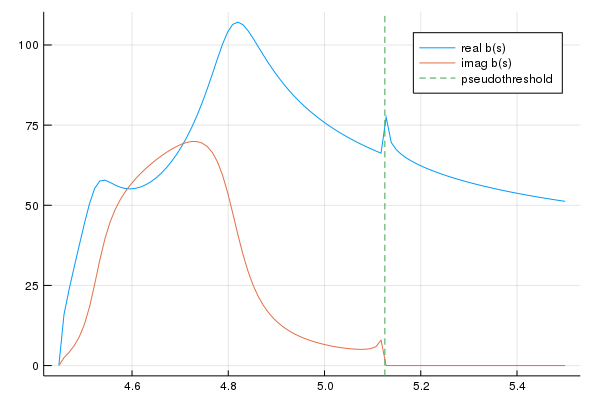

In [16]:
ev = LinRange(sqrt(th34)+1e-6,5.5,100)
cal = [bλ_proj(e^2) for e in ev]
plot(ev, real(cal), lab="real b(s)")
plot!(ev, imag(cal), lab="imag b(s)")
vline!([(sqrt(m1sq)-sqrt(m2sq))], ls=:dash, lab="pseudothreshold")

__The enhancement__ at the pseudothreshold is well understood and expected.
It is going to be integrated over when the last dipersive invegral is taken.

### The final integral
$$
A(s) = \frac{1}{\pi}\int_{(m_3+m_4)^2}^{\infty} \frac{\lambda^{1/2}(s',m_3^2,m_4^2)\, b(s')}{s'(s'-s-i0)} \mathrm{d}s'
$$

In [17]:
function A(s)
    function integrand(θ)
        sp = th34+tan(θ)
        bλ_proj(sp)/sp/(sp-s-1e-6im)/cos(θ)^2
    end
    (quadgk(integrand,0,π/2)[1]/π)::Complex{Float64}
end

A (generic function with 1 method)

I think the calculations can be speeded up by combining integrals to one 2d-simultaniously.

In [18]:
@time A(4.4^2)

  4.161734 seconds (9.71 M allocations: 541.297 MiB, 6.48% gc time)


3.324111424862469 + 1.254270326487358im

e = 3.3 -> 1.2436464537710759 + 0.26305321832385115im
e = 3.34 -> 1.2641696940002838 + 0.27032791675938056im
e = 3.39 -> 1.285919512085706 + 0.2781277891052202im
e = 3.43 -> 1.3090113301858337 + 0.28650993627673926im
e = 3.48 -> 1.3335766466746268 + 0.2955401745034895im
e = 3.52 -> 1.3597660598606967 + 0.3052947771916942im
e = 3.57 -> 1.387753026258111 + 0.31586265584642786im
e = 3.61 -> 1.4177385768757322 + 0.32734811606411524im
e = 3.66 -> 1.449957298345874 + 0.3398743754672167im
e = 3.7 -> 1.4846850066140616 + 0.3535881039828715im
e = 3.75 -> 1.5222487195617485 + 0.3686653549988387im
e = 3.79 -> 1.5630398044175773 + 0.38531941796896674im
e = 3.84 -> 1.6075315917801447 + 0.40381137098971304im
e = 3.88 -> 1.6563034069794051 + 0.4244645002403932im
e = 3.93 -> 1.710074044259329 + 0.44768437769722536im
e = 3.97 -> 1.7697495219943504 + 0.47398742319602893im
e = 4.02 -> 1.8364931349798381 + 0.5040425507563119im
e = 4.06 -> 1.911831647777491 + 0.5387336633381842im
e = 4.11 -> 1.997822747700

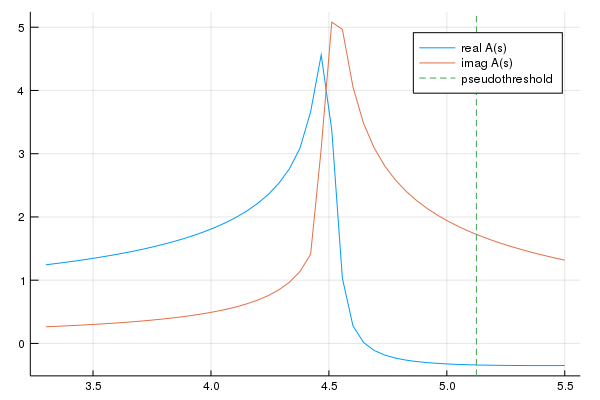

In [20]:
ev = LinRange(3.3,5.5,50)
cal = [begin v = A(e^2); println("e = $(round(e;digits=2)) -> $v"); v end for e in ev]
plot(ev, real(cal), lab="real A(s)")
plot!(ev, imag(cal), lab="imag A(s)")
vline!([(sqrt(m1sq)-sqrt(m2sq))], ls=:dash, lab="pseudothreshold")

The result matches Feynman method!